# State Farm Classification Exercise
## 1. Data cleaning

In [1]:
#standard import
import numpy as np
import pandas as pd
import os 
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1.1 loading and exploring the data

In [2]:
#loading data
Train = pd.read_csv(os.path.join(os.getcwd(), "exercise_40_train.csv"), header = 0)
Test = pd.read_csv(os.path.join(os.getcwd(), "exercise_40_test.csv"), header = 0)

Combine Test and Trian to Main for data cleaning

In [3]:
Main = pd.concat([Test.assign(ind="test"), Train.assign(ind="train")])
#test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [4]:
Main.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x93,x94,x95,x96,x97,x98,x99,x100,ind,y
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,...,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.567120,test,NaN
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076%,0.443209,0.522113,-1.090886,...,yes,4.276078,NaN,10.386987,12.527094,1,yes,98.607486,test,NaN
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-5e-04%,-1.167885,5.739275,0.222975,...,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246,test,NaN
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.016%,-2.662226,1.548050,0.210141,...,no,2.643847,1.662240,10.064961,10.550014,1,NaN,100.346261,test,NaN
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186%,0.056422,2.878167,-0.457618,...,yes,4.074434,NaN,9.255766,12.716137,1,yes,102.578918,test,NaN


In [5]:
Main.info(null_counts='True')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 39999
Columns: 102 entries, x1 to y
dtypes: float64(87), int64(2), object(13)
memory usage: 39.3+ MB


### 1.2 cleaning object features

In [6]:
#find the object features with null
Main.loc[:, Main.dtypes == np.object].info(null_counts='True')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x3      50000 non-null  object
 1   x7      50000 non-null  object
 2   x19     50000 non-null  object
 3   x24     45175 non-null  object
 4   x31     50000 non-null  object
 5   x33     41059 non-null  object
 6   x39     50000 non-null  object
 7   x60     50000 non-null  object
 8   x65     50000 non-null  object
 9   x77     38425 non-null  object
 10  x93     50000 non-null  object
 11  x99     33864 non-null  object
 12  ind     50000 non-null  object
dtypes: object(13)
memory usage: 5.3+ MB


In [7]:
Main.loc[:, Main.dtypes == np.object].head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99,ind
0,Wednesday,0.0098%,$120.216189955777,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN,test
1,Fri,0.0076%,$-267.562586413086,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes,test
2,Saturday,-5e-04%,$-311.292903116571,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes,test
3,Tuesday,-0.016%,$2229.14940030076,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN,test
4,Monday,0.0186%,$-469.049529991235,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes,test


Explore X3 and replace full name with Abbreviation

In [8]:
Main.x3.value_counts(dropna=False)

Wednesday    6154
Monday       5149
Friday       5064
Tuesday      4925
Sunday       4563
Saturday     4442
Tue          3636
Thursday     3493
Mon          2722
Wed          2567
Sat          2212
Thur         2069
Fri          2002
Sun          1002
Name: x3, dtype: int64

In [9]:
Main.x3=Train.x3.replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'], 
                 ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

In [10]:
Main.x3.value_counts(dropna=False)

Wed     8708
Tue     8557
Mon     7954
Fri     7012
Sat     6734
Thur    5546
Sun     5489
Name: x3, dtype: int64

Convert X7 to float

In [11]:
Main['x7'] = Main['x7'].str.rstrip('%').astype('float') / 100.0

Remove '$' from x19 and convert to float

In [12]:
Main['x19'] = Main['x19'].str.replace(',', '').str.replace('$', '').astype('float')

Explore X24 and fill null with 'unknown_gender'

In [13]:
Main.x24.value_counts(dropna=False)

female    22690
male      22485
NaN        4825
Name: x24, dtype: int64

In [14]:
Main.x24=Main.x24.fillna('unknown_gender')

In [15]:
Main.x24.value_counts(dropna=False)

female            22690
male              22485
unknown_gender     4825
Name: x24, dtype: int64

Explore X31 and replace no with 0, yes with 1

In [16]:
Main.x31.value_counts(dropna=False)

no     42522
yes     7478
Name: x31, dtype: int64

In [17]:
Main.x31=Train.x31.replace(['no', 'yes'], [ 0, 1])

In [18]:
Main.x31.value_counts(dropna=False)

0    42543
1     7457
Name: x31, dtype: int64

Explore X33 and fill null with 'unknown_state'

In [19]:
Main.x33.value_counts(dropna=False)

NaN               8941
California        4234
Texas             2845
Florida           2277
New York          2176
Pennsylvania      1554
Illinois          1546
Ohio              1392
Michigan          1227
Georgia           1154
North Carolina    1148
New Jersey        1074
Virginia           979
Washington         939
Tennessee          847
Indiana            836
Massachusetts      816
Arizona            789
Missouri           787
Wisconsin          780
Minnesota          759
Maryland           720
Alabama            703
Colorado           690
South Carolina     623
Louisiana          620
Kentucky           592
Oregon             554
Oklahoma           550
Connecticut        522
Utah               479
Kansas             465
Nevada             461
Arkansas           459
Mississippi        446
Iowa               442
Nebraska           400
New Mexico         395
West Virginia      370
Idaho              344
Hawaii             328
New Hampshire      304
Rhode Island       303
Maine      

In [20]:
Main.x33=Main.x33.fillna('unknown_state')

In [21]:
Main.x33.value_counts(dropna=False)

unknown_state     8941
California        4234
Texas             2845
Florida           2277
New York          2176
Pennsylvania      1554
Illinois          1546
Ohio              1392
Michigan          1227
Georgia           1154
North Carolina    1148
New Jersey        1074
Virginia           979
Washington         939
Tennessee          847
Indiana            836
Massachusetts      816
Arizona            789
Missouri           787
Wisconsin          780
Minnesota          759
Maryland           720
Alabama            703
Colorado           690
South Carolina     623
Louisiana          620
Kentucky           592
Oregon             554
Oklahoma           550
Connecticut        522
Utah               479
Kansas             465
Nevada             461
Arkansas           459
Mississippi        446
Iowa               442
Nebraska           400
New Mexico         395
West Virginia      370
Idaho              344
Hawaii             328
New Hampshire      304
Rhode Island       303
Maine      

Explore x39. That column contains only one value. So, the column can be deleted.

In [22]:
Main.x39.value_counts()

5-10 miles    50000
Name: x39, dtype: int64

In [23]:
Main = Main.drop(['x39'], axis=1)

Explore X60

In [24]:
Train.x60.value_counts(dropna=False)

December     8136
January      7922
July         7912
August       7907
June         1272
September    1245
February     1213
November     1043
April         951
March         807
May           799
October       793
Name: x60, dtype: int64

Explore X65

In [25]:
Train.x65.value_counts(dropna=False)

progressive    10877
allstate       10859
esurance        7144
farmers         5600
geico           5520
Name: x65, dtype: int64

Explore X77 and fill null with 'unknown_vendor'

In [26]:
Train.x77.value_counts(dropna=False)

NaN          9257
ford         9005
subaru       5047
chevrolet    5011
mercedes     4494
toyota       3555
nissan       2575
buick        1056
Name: x77, dtype: int64

In [27]:
Main.x77=Main.x77.fillna('unknown_vendor')

Explore X93. Replace 'no' with 0, 'yes' with 1

In [28]:
Main.x93.value_counts(dropna=False)

no     44354
yes     5646
Name: x93, dtype: int64

In [29]:
Main.x93=Train.x93.replace(['no', 'yes'], [ 0, 1])

In [30]:
Main.x93.value_counts(dropna=False)

0    44374
1     5626
Name: x93, dtype: int64

Explore X99. Replace 'yes' with 1. Fill NaN with 0

In [31]:
Main.x99.value_counts(dropna=False)

yes    33864
NaN    16136
Name: x99, dtype: int64

In [32]:
Main.x99=Main.x99.replace(['yes'], [1])
Main.x99=Main.x99.fillna(0)

In [33]:
Main.x99.value_counts(dropna=False)

1.0    33864
0.0    16136
Name: x99, dtype: int64

In [34]:
#check the object features with null
Main.loc[:, Main.dtypes == np.object].info(null_counts='True')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x3      50000 non-null  object
 1   x24     50000 non-null  object
 2   x33     50000 non-null  object
 3   x60     50000 non-null  object
 4   x65     50000 non-null  object
 5   x77     50000 non-null  object
 6   ind     50000 non-null  object
dtypes: object(7)
memory usage: 3.1+ MB


In [35]:
#check the new object features
Main.loc[:, Main.dtypes == np.object].head()

,x3,x24,x33,x60,x65,x77,ind
0,Wed,unknown_gender,Florida,May,progressive,mercedes,test
1,Fri,female,North Carolina,July,allstate,ford,test
2,Thur,male,unknown_state,January,progressive,unknown_vendor,test
3,Tue,female,Mississippi,July,geico,subaru,test
4,Sun,female,Georgia,January,progressive,ford,test


In [36]:
Main.info(null_counts='True')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 39999
Columns: 101 entries, x1 to y
dtypes: float64(90), int64(4), object(7)
memory usage: 38.9+ MB


In [37]:
#check the new object features
Main.loc[:, Main.dtypes == np.int64].head()

,x31,x59,x93,x98
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,1,0,1,1


## 1.2 Identify columns that may need further transformation:

Constant features (note: Binary 1/0, 'ind' test/train and 'y'. no transformation needed)

Categorical features for one-hot encoding (that are not already binary or one-hot encoded)

Numerical features

In [38]:
all_feat = list(Main.columns.values)

In [39]:
#Constant features
con_feat = ['x31','x59','x93','x98','x99','ind','y'] 

In [40]:
# Categorical features that are *not* already binary or one-hot encoded
cat_feat = ['x3', 'x24', 'x33', 'x60','x65', 'x77']

In [41]:
non_num_feat = con_feat + cat_feat

In [42]:
#Create Numerical featureas using all_features-(con_feat+cat_feat)
non_num_feat = con_feat + cat_feat
num_feat = [x for x in all_feat if (x not in non_num_feat)]

Check length to make sure all the features are there

In [43]:
len(all_feat)

101

In [44]:
len(con_feat)

7

In [45]:
len(cat_feat)

6

In [46]:
len(num_feat)

88

## 1.3 Prepare the data transformation pipeline

In [47]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler #, StandardScaler
from sklearn.compose import ColumnTransformer

In [48]:
# Define custom transformer: NoTransformer
# Just returns the feature without transformation

from sklearn.base import BaseEstimator, TransformerMixin

class NoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X

In [49]:
# Define another custom transformer: CapFloorTransformer
# Provides caps and floors for numerical features

class CapFloorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_feature_list):
        self.num_feature_list = num_feature_list
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_ = X.copy()
        for feature in self.num_feature_list:
            X_[feature] = np.where(X_[feature] < X_[feature].quantile(0.0005),
                                   X_[feature].quantile(0.0005), X_[feature])
            X_[feature] = np.where(X_[feature] > X_[feature].quantile(0.9995),
                                   X_[feature].quantile(0.9995), X_[feature])
        return X_

In [50]:
# Define pipeline for numerical features

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('cap_floor', CapFloorTransformer(num_feature_list=num_feat)),
    ('min_max', MinMaxScaler())
])

#### Define data transformation pipeline

In [51]:
full_pipeline = ColumnTransformer([
    ('no_trans', NoTransformer(), con_feat),
    ('categorical', OneHotEncoder(), cat_feat),
    ('numerical', num_pipeline, num_feat)
])

## 1.4 Run the pipeline to fit and transform Main

In [52]:
%%time

# Run pipeline fit_transform -- takes ~ 90 sec
Main_prepared = full_pipeline.fit_transform(Main)

CPU times: user 1.84 s, sys: 351 ms, total: 2.19 s
Wall time: 972 ms


In [53]:
Main_prepared.shape

(50000, 182)

In [54]:
Main_prepared

array([[0, 0, 0, ..., 0.5389060542036326, 0.2954983093304213,
        0.3048764763602221],
       [0, 0, 0, ..., 0.2772212679288337, 0.6879797078577634,
        0.4520051258250257],
       [0, 0, 0, ..., 0.397261459526135, 0.620510778610277,
        0.3343913177068121],
       ...,
       [1, 0, 0, ..., 0.5141453972092866, 0.3229301108227761,
        0.49331053805603675],
       [0, 0, 0, ..., 0.21207147833186046, 0.3965486900500568,
        0.7687971899910235],
       [0, 1, 0, ..., 0.06814300929219064, 0.6878870817949392,
        0.7943314687075262]], dtype=object)

## 1.5 Store prepared data in a pandas DataFrame:

Find column names for transformed data (including one-hot transformed features)

Find transformed column names

In [55]:
# Get column names for transformed df:
trans_col_names = []

for i in range(len(full_pipeline.transformers_)):
    trans = full_pipeline.transformers_[i][1]
    
    # Check if transformer is OHE instance
    if isinstance(trans, OneHotEncoder):
        
        # Create list of feature names for OHE transformer
        # Use .get_feature_names() from transformers_ and remove 'x0_' etc. from feature names by using only [3:]
        feat_names = [feat_name[3:] for feat_name in trans.get_feature_names()]
    else:
        
        # For non-OHE instances, access the feature names in full_pipeline.transformers_[i][2]
        feat_names = [feat_name for feat_name in full_pipeline.transformers_[i][2]]
        
    trans_col_names += feat_names

In [56]:
len(trans_col_names)

182

Create dataframe

In [57]:
# Create dataframe
Main_transformed = pd.DataFrame(Main_prepared, columns=trans_col_names)

In [58]:
Main_transformed.head()

,x31,x59,x93,x98,x99,ind,y,Fri,Mon,Sat,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0,0,0,0,0.0,test,NaN,0.0,0.0,0.0,...,0.866722,0.217677,0.891929,NaN,0.907117,0.355609,0.531887,0.538906,0.295498,0.304876
1,0,0,0,1,1.0,test,NaN,1.0,0.0,0.0,...,0.447324,0.004173,0.756481,0.416633,0.591244,0.47562,NaN,0.277221,0.68798,0.452005
2,0,0,0,0,1.0,test,NaN,0.0,0.0,0.0,...,0.638263,NaN,0.700983,0.620915,0.785095,0.251167,0.334468,0.397261,0.620511,0.334391
3,0,0,0,1,0.0,test,NaN,0.0,0.0,0.0,...,0.469652,0.483384,0.634022,0.574792,0.392599,0.307966,0.628135,0.23615,0.539577,0.50276
4,1,0,1,1,1.0,test,NaN,0.0,0.0,0.0,...,0.532595,0.15618,0.329675,0.418049,0.378916,0.454908,NaN,0.132944,0.70217,0.567932


## 1.6 Fill remaining Nan with -1

(For the test y, I'll drop the column later. So, I don't care for now.)

Remaining NaN values should only be numerical at this point.
Since numerical features have already been transformed by MinMaxScaler, now we can fill NaN with -1.

In [59]:
# Overall minimum numerical value
np.min(Main_transformed[num_feat].min())

0.0

In [60]:
# Overall maximum numerical value
np.max(Main_transformed[num_feat].max())

1.0000000000000002

In [61]:
%%time

# Fill NaN values with -1
Main_transformed = Main_transformed.fillna(-1)

CPU times: user 3.05 s, sys: 160 ms, total: 3.21 s
Wall time: 2.73 s


In [62]:
Main_transformed.head()

,x31,x59,x93,x98,x99,ind,y,Fri,Mon,Sat,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0,0,0,0,0.0,test,-1.0,0.0,0.0,0.0,...,0.866722,0.217677,0.891929,-1.000000,0.907117,0.355609,0.531887,0.538906,0.295498,0.304876
1,0,0,0,1,1.0,test,-1.0,1.0,0.0,0.0,...,0.447324,0.004173,0.756481,0.416633,0.591244,0.475620,-1.000000,0.277221,0.687980,0.452005
2,0,0,0,0,1.0,test,-1.0,0.0,0.0,0.0,...,0.638263,-1.000000,0.700983,0.620915,0.785095,0.251167,0.334468,0.397261,0.620511,0.334391
3,0,0,0,1,0.0,test,-1.0,0.0,0.0,0.0,...,0.469652,0.483384,0.634022,0.574792,0.392599,0.307966,0.628135,0.236150,0.539577,0.502760
4,1,0,1,1,1.0,test,-1.0,0.0,0.0,0.0,...,0.532595,0.156180,0.329675,0.418049,0.378916,0.454908,-1.000000,0.132944,0.702170,0.567932


## 1.7 Split train and test

In [63]:
test_transformed, train_transformed = Main_transformed[Main_transformed["ind"].eq("test")], Main_transformed[Main_transformed["ind"].eq("train")]

Drop column 'ind' for train and test

In [64]:
train_transformed = train_transformed.drop(['ind'], axis=1)
test_transformed = test_transformed.drop(['ind'], axis=1)

In [65]:
train_transformed.head()

,x31,x59,x93,x98,x99,y,Fri,Mon,Sat,Sun,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
10000,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.552565,0.179670,0.479024,0.462899,0.217523,0.600563,-1.000000,0.260461,0.320225,0.616750
10001,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,...,0.571926,0.171904,0.601845,0.570998,0.702668,0.380131,0.854944,-1.000000,0.536219,0.528575
10002,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.360281,-1.000000,0.640605,0.714877,0.181699,0.494158,-1.000000,0.069022,0.333980,0.765440
10003,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.644036,-1.000000,0.500483,0.595892,0.517615,0.457536,0.584533,-1.000000,0.436616,0.580864
10004,1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.279920,-1.000000,0.498980,0.811686,0.225621,0.368587,0.663337,0.226207,0.626097,0.286160


In [66]:
# save data locally
# train_transformed.to_pickle(os.path.join('train_transformed_minmax_final.pkl'))
# test_transformed.to_pickle(os.path.join('test_transformed_minmax_final.pkl'))

In [67]:
train_transformed.y.value_counts()

0.0    34197
1.0     5803
Name: y, dtype: int64

# 2 Modeling 
Create X & y objects with train_transformed

In [68]:
X = train_transformed.drop(['y'], axis=1)
y = train_transformed.y

In [69]:
X.shape

(40000, 180)

In [70]:
y.shape

(40000,)

Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 365) 

## 2.1 logistic regression model

In [72]:
# Import classification model:
from sklearn.linear_model import LogisticRegression

# Import other tools:
from sklearn.metrics import precision_recall_curve, auc, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Visualization
%matplotlib inline
import matplotlib.pyplot as plt

### 2.1.1 Run quick logistic regression model

In [73]:
LR = LogisticRegression(multi_class='ovr')

In [74]:
# Default hyperparameters
print(LR.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [75]:
%%time
# Fit model
LR.fit(X_train, y_train)

CPU times: user 1.8 s, sys: 174 ms, total: 1.98 s
Wall time: 507 ms


LogisticRegression(multi_class='ovr')

In [76]:
# Calculate accuracy score for training prediction:
LR_Q_train_accuracy = LR.score(X_train, y_train)

print('quick logistic regression accuracy: \t%0.4f' % LR_Q_train_accuracy)

quick logistic regression accuracy: 	0.8590


### 2.1.2 Tune hyperparameters using GridSearchCV

In [77]:
# Specify parameters to search
LR_param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [1e-3, 1e-2, 1e-1, 1, 10, 100],
              'solver' : ['liblinear','lbfgs']}

In [78]:
LR_grid_search = GridSearchCV(estimator=LR,
                           param_grid=LR_param_grid,
                           cv=5)

In [79]:
%%time

# Fit
LR_grid_search.fit(X_train, y_train)

CPU times: user 3min 45s, sys: 12.1 s, total: 3min 57s
Wall time: 2min 48s


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [80]:
LR_grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [81]:
LR_best = LR_grid_search.best_estimator_

In [82]:
%%time

# Fit model
LR_best.fit(X_train, y_train)

CPU times: user 1.64 s, sys: 102 ms, total: 1.74 s
Wall time: 439 ms


LogisticRegression(C=0.1, multi_class='ovr')

In [83]:
# Calculate accuracy score for training prediction:
LR_train_accuracy_best = LR_best.score(X_train, y_train)
print('Best logistic regression accuracy: \t%0.4f' % LR_train_accuracy_best)

Best logistic regression accuracy: 	0.8581


### 2.1.3 Test optimized model against test set

In [84]:
y_pred_test_LR = LR_best.predict(X_test)

In [85]:
# Classification report
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92      6883
         1.0       0.53      0.06      0.11      1117

    accuracy                           0.86      8000
   macro avg       0.70      0.53      0.52      8000
weighted avg       0.82      0.86      0.81      8000



In [86]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_test_LR))

[[6822   61]
 [1049   68]]


### 2.1.4 Evaluate AUC for ROC and PR for performance against test set

For imbalanced targets, area under the precision-recall curve is usually a better indicator of model performance than area under the receiver operating characteristic curve.

In [87]:
# Find probability estimates for y_pred_test
y_pred_proba_test_LR = LR_best.predict_proba(X_test)[:, 1] # use second column for probabilities

In [88]:
# Calculate false positive rate and true positive rate:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_test_LR)

# Calculate precision and recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_test_LR)

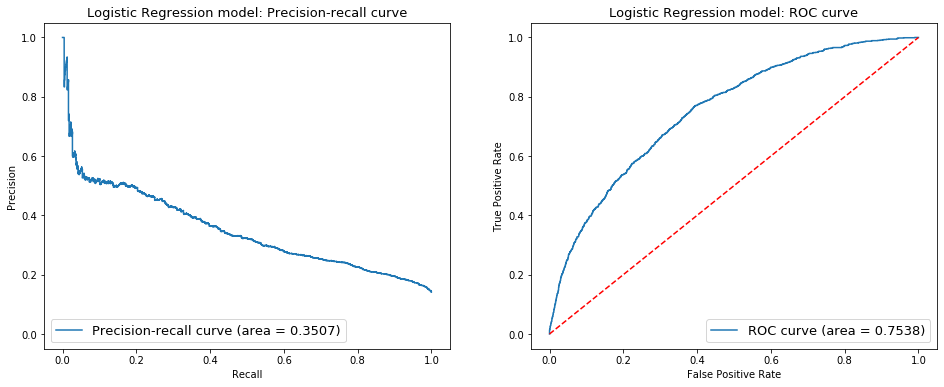

In [89]:
# Plot Precision-Recall curve for clf_best:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.step(recall, precision, label='Precision-recall curve (area = %0.4f)' % auc(recall, precision))
plt.title('Logistic Regression model: Precision-recall curve', size=13)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left', fontsize=13)
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])

# Plot ROC curve for clf_best:
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Logistic Regression model: ROC curve', size=13)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=13)
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])

plt.show()

In [90]:
# Area under curve for ROC
auc(fpr, tpr)

0.7537954695120944

In [91]:
# Area under precision-recall curve
auc(recall, precision)

0.350694974716933

## 2.2 DNN in Keras model

In [92]:
# Import Keras and Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Create validation set from training data to evaluate model training

In [93]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train,test_size = 0.2, random_state = 365) 

### Convert pandas dataframes to NumPy arrays

NOTE: In order to use validation_split or validation_data during model training, the training data should be in NumPy format.

In [94]:
X_train_train_np = X_train_train.to_numpy()
y_train_train_np = y_train_train.to_numpy()
X_train_val_np = X_train_val.to_numpy()
y_train_val_np = y_train_val.to_numpy()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

### 2.2.1 Run a quick DNN model 

In [95]:
# Create Sequential model with 2 hidden layers

DNN = keras.Sequential()
DNN.add(layers.Dense(300, input_shape=(X_train.shape[1],), activation='relu', name='layer1'))
DNN.add(layers.Dense(100, activation='relu', name='layer2'))
DNN.add(layers.Dense(30, activation='relu', name='layer3'))
DNN.add(layers.Dense(1, activation='sigmoid', name='ouput'))

In [96]:
DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 300)               54300     
_________________________________________________________________
layer2 (Dense)               (None, 100)               30100     
_________________________________________________________________
layer3 (Dense)               (None, 30)                3030      
_________________________________________________________________
ouput (Dense)                (None, 1)                 31        
Total params: 87,461
Trainable params: 87,461
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Compile model
DNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])

In [98]:
 %%time

 # Use early stopping if model does not improve after 5 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

 # Fit model
 history = DNN.fit(X_train_train_np, y_train_train_np,
                    epochs=20,
                    validation_data=(X_train_val_np, y_train_val_np),
                    callbacks=[early_stopping_cb]) 

Train on 25600 samples, validate on 6400 samples
Epoch 1/20
25600/25600 [==============================] - 2s 72us/sample - loss: 0.3952 - accuracy: 0.8527 - AUC: 0.6639 - val_loss: 0.3768 - val_accuracy: 0.8550 - val_AUC: 0.7191
Epoch 2/20
25600/25600 [==============================] - 1s 44us/sample - loss: 0.3700 - accuracy: 0.8546 - AUC: 0.7362 - val_loss: 0.3691 - val_accuracy: 0.8558 - val_AUC: 0.7346
Epoch 3/20
25600/25600 [==============================] - 1s 44us/sample - loss: 0.3585 - accuracy: 0.8575 - AUC: 0.7616 - val_loss: 0.3719 - val_accuracy: 0.8552 - val_AUC: 0.7321
Epoch 4/20
25600/25600 [==============================] - 1s 43us/sample - loss: 0.3491 - accuracy: 0.8620 - AUC: 0.7789 - val_loss: 0.3738 - val_accuracy: 0.8550 - val_AUC: 0.7278
Epoch 5/20
25600/25600 [==============================] - 1s 44us/sample - loss: 0.3361 - accuracy: 0.8645 - AUC: 0.8012 - val_loss: 0.3794 - val_accuracy: 0.8545 - val_AUC: 0.7251
Epoch 6/20
25600/25600 [======================

In [99]:
# Evaluate against test set
DNN_test_loss, DNN_test_acc, DNN_test_auc = DNN.evaluate(X_test_np, y_test_np)
print('deep neural network quick Test loss: \t%0.4f' % DNN_test_loss)
print('deep neural network quick Test accuracy: \t%0.4f' % DNN_test_acc)
print('deep neural network quick Test AUC: \t%0.4f' % DNN_test_auc)

8000/8000 [==============================] - 0s 21us/sample - loss: 0.3618 - accuracy: 0.8619 - AUC: 0.7313
deep neural network quick Test loss: 	0.3618
deep neural network quick Test accuracy: 	0.8619
deep neural network quick Test AUC: 	0.7313


In [100]:
# Find probability estimates
y_pred_proba_test_quick_DNN = DNN.predict(X_test_np) # use predict for probabilities

In [101]:
# # Calculate false positive rate and true positive rate:
DNN_fpr_quick, DNN_tpr_quick, DNN_thresholds_roc_quick = roc_curve(y_test_np, y_pred_proba_test_quick_DNN)

# # Calculate precision and recall
DNN_precision_quick, DNN_recall_quick, DNN_thresholds_pr_quick = precision_recall_curve(y_test_np, y_pred_proba_test_quick_DNN)

In [102]:
# Area under curve for ROC
auc(DNN_fpr_quick, DNN_tpr_quick)

0.7313740300047696

In [103]:
# Area under precision-recall curve
auc(DNN_recall_quick, DNN_precision_quick)

0.3248472685689368

### 2.2.2 Tune hyperparameters for DNN model

In [104]:
# Create function to build and compile model
def build_model(n_neurons1=300, n_neurons2=100, n_hidden_add=1, n_neurons_add=50, dropout=True,
                input_shape=(X_train.shape[1],)):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape)) # Create input layer
    model.add(layers.Dense(n_neurons1, activation='elu')) # First hidden layer
    model.add(layers.Dense(n_neurons2, activation='elu')) # Second hidden layer
    for layer in range(n_hidden_add):
        model.add(layers.Dense(n_neurons_add, activation='elu')) # Additional hidden layer(s)
    if dropout:
        model.add(layers.Dropout(rate=0.1)) # Optional dropout layer after last hidden layer
    model.add(layers.Dense(1, activation='sigmoid')) # Output layer
    optimizer = keras.optimizers.Adam(lr=0.0005)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])
    return model

In [105]:
# Create KerasClassifier model
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [106]:
# Define parameter grid
n_neurons1 = [200,300]
n_neurons2 = [100,200]
n_hidden_add = [2, 3]
n_neurons_add = [30]
dropout = [True]

DNN_param_grid = dict(n_neurons1=n_neurons1,
                  n_neurons2=n_neurons2,
                  n_hidden_add=n_hidden_add,
                  n_neurons_add=n_neurons_add,
                  dropout=dropout)

In [107]:
DNN_grid_search = GridSearchCV(estimator=keras_clf,
                               param_grid=DNN_param_grid,
                               cv=5)

In [108]:
%%time

# Use early stopping if model does not improve after 5 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

DNN_grid_search.fit(X_train_train_np, y_train_train_np, epochs=20,
                validation_data=(X_train_val_np, y_train_val_np),
                callbacks=[early_stopping_cb])

Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 76us/sample - loss: 0.3983 - accuracy: 0.8531 - AUC: 0.6492 - val_loss: 0.3881 - val_accuracy: 0.8556 - val_AUC: 0.7158
Epoch 2/20
20480/20480 [==============================] - 1s 47us/sample - loss: 0.3753 - accuracy: 0.8553 - AUC: 0.7209 - val_loss: 0.3720 - val_accuracy: 0.8552 - val_AUC: 0.7328
Epoch 3/20
20480/20480 [==============================] - 1s 47us/sample - loss: 0.3665 - accuracy: 0.8570 - AUC: 0.7420 - val_loss: 0.3690 - val_accuracy: 0.8559 - val_AUC: 0.7339
Epoch 4/20
20480/20480 [==============================] - 1s 47us/sample - loss: 0.3631 - accuracy: 0.8572 - AUC: 0.7501 - val_loss: 0.3770 - val_accuracy: 0.8520 - val_AUC: 0.7423
Epoch 5/20
20480/20480 [==============================] - 1s 48us/sample - loss: 0.3588 - accuracy: 0.8583 - AUC: 0.7573 - val_loss: 0.3715 - val_accuracy: 0.8564 - val_AUC: 0.7273
Epoch 6/20
20480/20480 [======================

20480/20480 [==============================] - 1s 51us/sample - loss: 0.3664 - accuracy: 0.8552 - AUC: 0.7445 - val_loss: 0.3744 - val_accuracy: 0.8530 - val_AUC: 0.7311
Epoch 4/20
20480/20480 [==============================] - 1s 59us/sample - loss: 0.3620 - accuracy: 0.8568 - AUC: 0.7531 - val_loss: 0.3684 - val_accuracy: 0.8566 - val_AUC: 0.7342
Epoch 5/20
20480/20480 [==============================] - 1s 60us/sample - loss: 0.3569 - accuracy: 0.8570 - AUC: 0.7632 - val_loss: 0.3714 - val_accuracy: 0.8564 - val_AUC: 0.7303
Epoch 6/20
20480/20480 [==============================] - 1s 53us/sample - loss: 0.3528 - accuracy: 0.8599 - AUC: 0.7711 - val_loss: 0.3798 - val_accuracy: 0.8486 - val_AUC: 0.7279
Epoch 7/20
20480/20480 [==============================] - 1s 56us/sample - loss: 0.3479 - accuracy: 0.8611 - AUC: 0.7801 - val_loss: 0.3743 - val_accuracy: 0.8544 - val_AUC: 0.7240
Epoch 8/20
20480/20480 [==============================] - 1s 54us/sample - loss: 0.3445 - accuracy: 0.8624

Epoch 7/20
20480/20480 [==============================] - 1s 60us/sample - loss: 0.3545 - accuracy: 0.8589 - AUC: 0.7713 - val_loss: 0.3723 - val_accuracy: 0.8572 - val_AUC: 0.7291
Epoch 8/20
20480/20480 [==============================] - 1s 58us/sample - loss: 0.3514 - accuracy: 0.8610 - AUC: 0.7749 - val_loss: 0.3711 - val_accuracy: 0.8562 - val_AUC: 0.7308
Epoch 9/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3459 - accuracy: 0.8629 - AUC: 0.7841 - val_loss: 0.3763 - val_accuracy: 0.8556 - val_AUC: 0.7262
Epoch 10/20
5120/5120 [==============================] - 0s 67us/sample - loss: 0.3639 - accuracy: 0.8578 - AUC: 0.7426
Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 99us/sample - loss: 0.4027 - accuracy: 0.8518 - AUC: 0.6426 - val_loss: 0.3828 - val_accuracy: 0.8550 - val_AUC: 0.7184
Epoch 2/20
20480/20480 [==============================] - 1s 60us/sample - loss: 0.3744 - accuracy: 0.8553 

5120/5120 [==============================] - 0s 67us/sample - loss: 0.3726 - accuracy: 0.8531 - AUC: 0.7376
Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 97us/sample - loss: 0.4030 - accuracy: 0.8508 - AUC: 0.6463 - val_loss: 0.3992 - val_accuracy: 0.8548 - val_AUC: 0.7176
Epoch 2/20
20480/20480 [==============================] - 1s 59us/sample - loss: 0.3787 - accuracy: 0.8536 - AUC: 0.7190 - val_loss: 0.3706 - val_accuracy: 0.8570 - val_AUC: 0.7317
Epoch 3/20
20480/20480 [==============================] - 1s 67us/sample - loss: 0.3678 - accuracy: 0.8553 - AUC: 0.7444 - val_loss: 0.3727 - val_accuracy: 0.8545 - val_AUC: 0.7251
Epoch 4/20
20480/20480 [==============================] - 1s 59us/sample - loss: 0.3649 - accuracy: 0.8560 - AUC: 0.7508 - val_loss: 0.3690 - val_accuracy: 0.8562 - val_AUC: 0.7325
Epoch 5/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3605 - accuracy: 0.8578 - AUC: 0.758

Epoch 8/20
20480/20480 [==============================] - 1s 65us/sample - loss: 0.3466 - accuracy: 0.8638 - AUC: 0.7786 - val_loss: 0.3760 - val_accuracy: 0.8544 - val_AUC: 0.7261
Epoch 9/20
5120/5120 [==============================] - 0s 69us/sample - loss: 0.3743 - accuracy: 0.8504 - AUC: 0.7416
Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 100us/sample - loss: 0.4051 - accuracy: 0.8519 - AUC: 0.6381 - val_loss: 0.3761 - val_accuracy: 0.8548 - val_AUC: 0.7184
Epoch 2/20
20480/20480 [==============================] - 1s 65us/sample - loss: 0.3794 - accuracy: 0.8526 - AUC: 0.7177 - val_loss: 0.3845 - val_accuracy: 0.8559 - val_AUC: 0.7373
Epoch 3/20
20480/20480 [==============================] - 1s 63us/sample - loss: 0.3703 - accuracy: 0.8540 - AUC: 0.7393 - val_loss: 0.3697 - val_accuracy: 0.8567 - val_AUC: 0.7318
Epoch 4/20
20480/20480 [==============================] - 1s 62us/sample - loss: 0.3668 - accuracy: 0.8560 

Epoch 5/20
20480/20480 [==============================] - 1s 56us/sample - loss: 0.3596 - accuracy: 0.8581 - AUC: 0.7560 - val_loss: 0.3744 - val_accuracy: 0.8570 - val_AUC: 0.7389
Epoch 6/20
20480/20480 [==============================] - 1s 56us/sample - loss: 0.3543 - accuracy: 0.8608 - AUC: 0.7652 - val_loss: 0.3750 - val_accuracy: 0.8528 - val_AUC: 0.7327
Epoch 7/20
20480/20480 [==============================] - 1s 56us/sample - loss: 0.3497 - accuracy: 0.8620 - AUC: 0.7749 - val_loss: 0.3716 - val_accuracy: 0.8552 - val_AUC: 0.7337
Epoch 8/20
20480/20480 [==============================] - 1s 57us/sample - loss: 0.3457 - accuracy: 0.8643 - AUC: 0.7802 - val_loss: 0.3795 - val_accuracy: 0.8581 - val_AUC: 0.7291
Epoch 9/20
5120/5120 [==============================] - 0s 69us/sample - loss: 0.3733 - accuracy: 0.8521 - AUC: 0.7422
Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 92us/sample - loss: 0.4006 - accuracy: 0.8521 -

Epoch 2/20
20480/20480 [==============================] - 1s 59us/sample - loss: 0.3753 - accuracy: 0.8542 - AUC: 0.7225 - val_loss: 0.3779 - val_accuracy: 0.8556 - val_AUC: 0.7321
Epoch 3/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3668 - accuracy: 0.8559 - AUC: 0.7417 - val_loss: 0.3765 - val_accuracy: 0.8536 - val_AUC: 0.7383
Epoch 4/20
20480/20480 [==============================] - 1s 60us/sample - loss: 0.3639 - accuracy: 0.8573 - AUC: 0.7458 - val_loss: 0.3662 - val_accuracy: 0.8578 - val_AUC: 0.7422
Epoch 5/20
20480/20480 [==============================] - 1s 60us/sample - loss: 0.3608 - accuracy: 0.8581 - AUC: 0.7538 - val_loss: 0.3735 - val_accuracy: 0.8481 - val_AUC: 0.7344
Epoch 6/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3563 - accuracy: 0.8599 - AUC: 0.7615 - val_loss: 0.3728 - val_accuracy: 0.8550 - val_AUC: 0.7330
Epoch 7/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3526 - accur

Epoch 6/20
20480/20480 [==============================] - 1s 66us/sample - loss: 0.3569 - accuracy: 0.8580 - AUC: 0.7653 - val_loss: 0.3802 - val_accuracy: 0.8561 - val_AUC: 0.7305
Epoch 7/20
20480/20480 [==============================] - 1s 64us/sample - loss: 0.3522 - accuracy: 0.8601 - AUC: 0.7723 - val_loss: 0.3781 - val_accuracy: 0.8553 - val_AUC: 0.7255
Epoch 8/20
5120/5120 [==============================] - 0s 67us/sample - loss: 0.3601 - accuracy: 0.8574 - AUC: 0.7551
Train on 20480 samples, validate on 6400 samples
Epoch 1/20
20480/20480 [==============================] - 2s 95us/sample - loss: 0.4006 - accuracy: 0.8529 - AUC: 0.6458 - val_loss: 0.3799 - val_accuracy: 0.8545 - val_AUC: 0.7147
Epoch 2/20
20480/20480 [==============================] - 1s 61us/sample - loss: 0.3783 - accuracy: 0.8544 - AUC: 0.7129 - val_loss: 0.3694 - val_accuracy: 0.8573 - val_AUC: 0.7347
Epoch 3/20
20480/20480 [==============================] - 1s 63us/sample - loss: 0.3681 - accuracy: 0.8548 -

Epoch 5/20
20480/20480 [==============================] - 1s 67us/sample - loss: 0.3618 - accuracy: 0.8562 - AUC: 0.7560 - val_loss: 0.3695 - val_accuracy: 0.8567 - val_AUC: 0.7355
Epoch 6/20
20480/20480 [==============================] - 1s 65us/sample - loss: 0.3573 - accuracy: 0.8572 - AUC: 0.7639 - val_loss: 0.3753 - val_accuracy: 0.8567 - val_AUC: 0.7278
Epoch 7/20
20480/20480 [==============================] - 1s 65us/sample - loss: 0.3545 - accuracy: 0.8590 - AUC: 0.7700 - val_loss: 0.3755 - val_accuracy: 0.8580 - val_AUC: 0.7319
Epoch 8/20
20480/20480 [==============================] - 1s 64us/sample - loss: 0.3474 - accuracy: 0.8626 - AUC: 0.7815 - val_loss: 0.3759 - val_accuracy: 0.8525 - val_AUC: 0.7257
Epoch 9/20
20480/20480 [==============================] - 1s 66us/sample - loss: 0.3417 - accuracy: 0.8637 - AUC: 0.7912 - val_loss: 0.3910 - val_accuracy: 0.8452 - val_AUC: 0.7222
Epoch 10/20
5120/5120 [==============================] - 0s 67us/sample - loss: 0.3633 - accura

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8b7d69c3d0>,
             param_grid={'dropout': [True], 'n_hidden_add': [2, 3],
                         'n_neurons1': [200, 300], 'n_neurons2': [100, 200],
                         'n_neurons_add': [30]})

In [109]:
DNN_grid_search.best_params_

{'dropout': True,
 'n_hidden_add': 2,
 'n_neurons1': 300,
 'n_neurons2': 100,
 'n_neurons_add': 30}

In [110]:
DNN_best = DNN_grid_search.best_estimator_.model

In [111]:
DNN_best.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 300)               54300     
_________________________________________________________________
dense_221 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_222 (Dense)            (None, 30)                3030      
_________________________________________________________________
dense_223 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_40 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_224 (Dense)            (None, 1)                 31        
Total params: 88,391
Trainable params: 88,391
Non-trainable params: 0
_________________________________________________

In [112]:
# Evaluate train set
DNN_train_loss_best, DNN_train_acc_best, DNN_train_auc_best = DNN_best.evaluate(X_train_train_np, y_train_train_np)
print('deep neural network best Train loss: \t%0.4f' % DNN_train_loss_best)
print('deep neural network best Train accuracy: \t%0.4f' % DNN_train_acc_best)
print('deep neural network best Train AUC: \t%0.4f' % DNN_train_auc_best)

25600/25600 [==============================] - 1s 28us/sample - loss: 0.3576 - accuracy: 0.8582 - AUC: 0.7658
deep neural network best Train loss: 	0.3576
deep neural network best Train accuracy: 	0.8582
deep neural network best Train AUC: 	0.7658


### 2.2.3 DNN Test optimized model against test set

In [113]:
# Evaluate against test set
DNN_test_loss_best, DNN_test_acc_best, DNN_test_auc_best = DNN_best.evaluate(X_test_np, y_test_np)
print('deep neural network best Test loss: \t%0.4f' % DNN_test_loss_best)
print('deep neural network best Test accuracy: \t%0.4f' % DNN_test_acc_best)
print('deep neural network best Test AUC: \t%0.4f' % DNN_test_auc_best)

8000/8000 [==============================] - 0s 32us/sample - loss: 0.3594 - accuracy: 0.8627 - AUC: 0.7356
deep neural network best Test loss: 	0.3594
deep neural network best Test accuracy: 	0.8627
deep neural network best Test AUC: 	0.7356


In [114]:
# Predict label using predict_classes
y_pred_test_DNN = (DNN_best.predict(X_test_np) > 0.5).astype("int32")

In [115]:
# Classification report
print(classification_report(y_test, y_pred_test_DNN))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      6883
         1.0       0.59      0.05      0.10      1117

    accuracy                           0.86      8000
   macro avg       0.73      0.52      0.51      8000
weighted avg       0.83      0.86      0.81      8000



In [116]:
# Examine confusion matrix
print(confusion_matrix(y_test, y_pred_test_DNN))

[[6842   41]
 [1057   60]]


### 2.2.4 DNN Evaluate AUC for ROC and PR for performance against test set

In [117]:
# Find probability estimates
y_pred_proba_test_best_DNN = DNN_best.predict(X_test_np) # use predict for probabilities

In [118]:
# # Calculate false positive rate and true positive rate:
DNN_fpr_best, DNN_tpr_best, DNN_thresholds_roc_best = roc_curve(y_test_np, y_pred_proba_test_best_DNN)

# # Calculate precision and recall
DNN_precision_best, DNN_recall_best, DNN_thresholds_pr_best = precision_recall_curve(y_test_np, y_pred_proba_test_best_DNN)

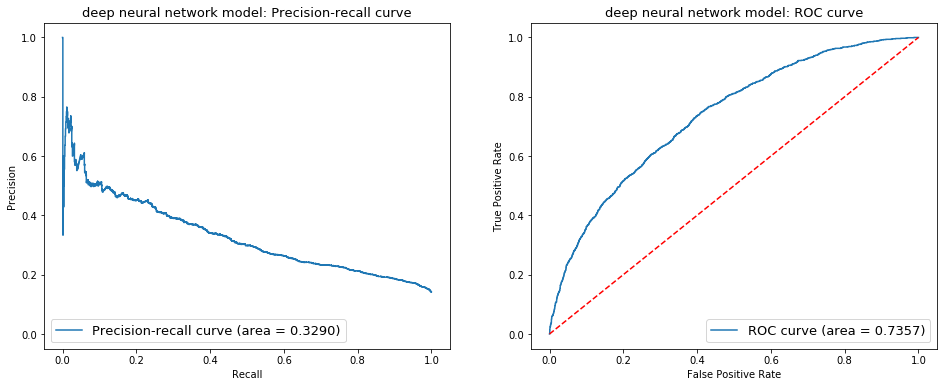

In [119]:
# Plot Precision-Recall curve for clf_best:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.step(DNN_recall_best, DNN_precision_best, label='Precision-recall curve (area = %0.4f)' % auc(DNN_recall_best, DNN_precision_best))
plt.title('deep neural network model: Precision-recall curve', size=13)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left', fontsize=13)
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])

# Plot ROC curve for clf_best:
plt.subplot(1,2,2)
plt.plot(DNN_fpr_best, DNN_tpr_best, label='ROC curve (area = %0.4f)' % auc(DNN_fpr_best, DNN_tpr_best))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('deep neural network model: ROC curve', size=13)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=13)
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])

plt.show()

In [120]:
# Area under curve for ROC
auc(DNN_fpr_best, DNN_tpr_best)

0.7357137347851823

In [121]:
# Area under precision-recall curve
auc(DNN_recall_best, DNN_precision_best)

0.32895689022179403

# 3 Generate predictions

In [122]:
# Prepare test input
X_fininal_test = test_transformed.drop(['y'], axis=1)

In [123]:
# Predictions for Logistic Regression
y_LR = LR_best.predict(X_fininal_test)

In [124]:
# Prepare np test input for DNN
X_fininal_test_np = X_fininal_test.to_numpy()

In [125]:
# Predictions for DNN
y_DNN = (DNN_best.predict(X_fininal_test_np) > 0.5).astype("int32")

In [126]:
#Save predictions to csv
#pd.DataFrame(y_LR).to_csv(os.path.join("glmresults.csv"))
#pd.DataFrame(y_DNN).to_csv(os.path.join("nonglmresults.csv"))

# 4 Compare the modeling approaches

To compare the two models, I will compare train accuracy, test accuracy, Area under ROC curve and Area under precision recall curve.

In [127]:
# define estimates for the logistic regression model
LR_train_accuracy_best = "{0:0.4f}".format(LR_best.score(X_train, y_train))
LR_test_accuracy_best = "{0:0.4f}".format(LR_best.score(X_test, y_test))
LR_AUC_ROC = "{0:0.4f}".format(auc(fpr, tpr))
LR_AUC_precision_recall = "{0:0.4f}".format(auc(recall, precision))

In [128]:
# define estimates for the Deep neural network model
DNN_train_accuracy_best = "{0:0.4f}".format(DNN_train_acc_best)
DNN_test_accuracy_best = "{0:0.4f}".format(DNN_test_acc_best)
DNN_AUC_ROC = "{0:0.4f}".format(auc(DNN_fpr_best, DNN_tpr_best))
DNN_AUC_precision_recall = "{0:0.4f}".format(auc(DNN_recall_best, DNN_precision_best))

In [129]:
# Create a table to compare the estimates of the two models
d = {'Model': ['Logistic Regression', 'Deep neural network'], 
     'Train Accuracy': [LR_train_accuracy_best, DNN_train_accuracy_best],
     'Test Accuracy': [LR_test_accuracy_best, DNN_test_accuracy_best],
     'AUC ROC':[LR_AUC_ROC,DNN_AUC_ROC],
     'AUC precision recall':[LR_AUC_precision_recall,DNN_AUC_precision_recall]
    }
df = pd.DataFrame(data=d)
df

,Model,Train Accuracy,Test Accuracy,AUC ROC,AUC precision recall
0,Logistic Regression,0.8581,0.8612,0.7538,0.3507
1,Deep neural network,0.8582,0.8627,0.7357,0.3290


## executive summary

Logistic regression (LR) model is a very basic model to solve classification problems. The model is easy to understand. With proper regulation, such as cross validation, overfitting can be avoided.  However, the model doesn’t have enough flexibility to handle data set with complex variables,

Deep neural network (DNN) model is used for various of classification problems. The model has enough flexibility to handle complex problems. The disadvantage of the model is it needs feed by large amount of the data to perform better than other models.

My model recommendation will be based on 2 assumptions. One assumption is the ration of 0 and 1 in the test set is similar to the train set. The other one is the predictions of the minority class is more important than the predictions of majority class. Based on these 2 assumptions, I think the logistic regression algorithm perform better. The accuracies of the 2 algorithms are very close, based on the train and test accuracy, no overfitting. However, I choose logistic regression for following reasons. First, the AUCs of logistic regression are better than the AUCs of Deep Neural Network, which means the logistic regression model has better prediction of the minority class.  Second, the dataset is relatively small. Generally, Deep Neural Network performance less good than logistic regression in small dataset.

Logistic regression model has a better prediction on the minority class on our dataset. For example, you are trying to hire a talent people. However, you need to interview 10 people. So, you don’t care about the majority class are not qualified. You want to focus more on the minority which may qualified. So, the prediction for the minority is more important in this case. 
Back to our project, the prediction of the minority class is more important. So, we will use logistic regression model.

